In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

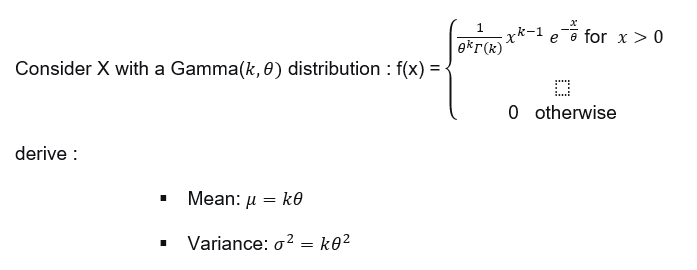

## Ans 

# **Derivation of Mean and Variance of Gamma Distribution**

The probability density function (PDF) is:

$$
f(x) = \frac{1}{\theta^k \Gamma(k)} x^{k-1} e^{-x/theta}, \quad x > 0
$$

where $( \Gamma(k) $) is the **Gamma function**:

$$
\Gamma(k) = \int_0^\infty t^{k-1} e^{-t} dt
$$

---

## **Derivation of Mean $(E[X])$**
The expectation of $(X)$ is given by:

$$
E[X] = \int_0^\infty x f(x) dx
$$

Substituting the Gamma PDF:

$$
E[X] = \int_0^\infty x \frac{1}{\theta^k \Gamma(k)} x^{k-1} e^{-x/\theta} dx
$$

$$
= \frac{1}{\theta^k \Gamma(k)} \int_0^\infty x^k e^{-x/\theta} dx
$$

Using the **Gamma function property**:

$$
\int_0^\infty x^m e^{-x/\theta} dx = \theta^{m+1} \Gamma(m+1)
$$

Setting $( m = k )$, we get:

$$
E[X] = \frac{1}{\theta^k \Gamma(k)} \cdot \theta^{k+1} \Gamma(k+1)
$$

Using $( \Gamma(k+1) = k \Gamma(k) )$, we simplify:

$$
E[X] = k\theta
$$

the **mean** is:

$$
\mu = k\theta
$$

---

## **Derivation of Variance $( \text{Var}(X) )$**
The variance formula is:

$$
\text{Var}(X) = E[X^2] - (E[X])^2
$$

since:

$$
E[X] = k\theta
$$

then:

$$
(E[X])^2 = k^2\theta^2
$$

apply  **Gamma expectation property**:

$$
E[X^2] = k (k+1) \theta^2
$$

Now, substitute into the variance formula:

$$
\text{Var}(X) = k (k+1) \theta^2 - k^2 \theta^2
$$

Expanding:

$$
= k\theta^2 (k+1) - k^2 \theta^2
$$

$$
= k^2 \theta^2 + k\theta^2 - k^2 \theta^2
$$

Cancel $( k^2 \theta^2 )$:

$$
= k\theta^2
$$

ans the **variance** is:

$$
\sigma^2 = k\theta^2
$$
2$


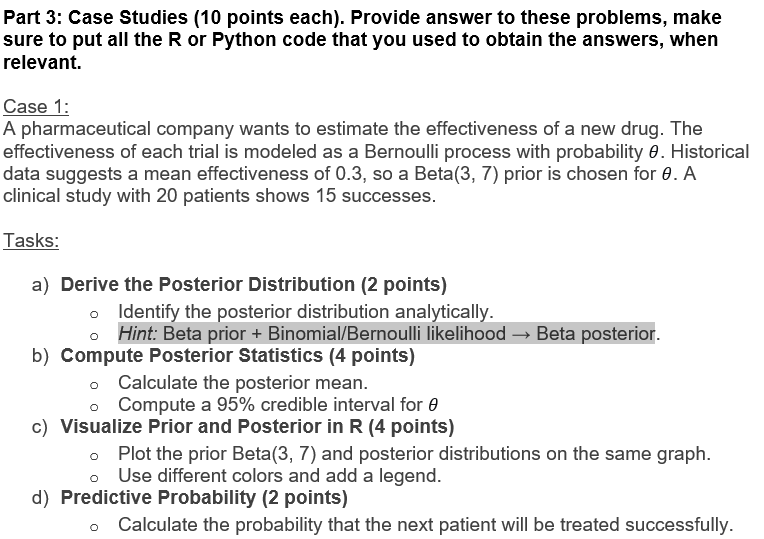

### Letter A

$$
\theta \sim \text{Beta}(3, 7)
$$

A clinical study with 20 patients yields 15 successes.

### Deriving

Using the conjugacy property of the Beta prior with a Binomial likelihood:

- Prior: $\theta \sim \text{Beta}(\alpha, \beta) = \text{Beta}(3, 7)$
- Likelihood: $X \sim \text{Binomial}(n=20, \theta)$ with $x=15$ successes
- Posterior:

$$
\theta | X \sim \text{Beta}(\alpha + x, \beta + n - x)
$$

Substituting values:

$$
\theta | X \sim \text{Beta}(3 + 15, 7 + 5) = \text{Beta}(18, 12)
$$

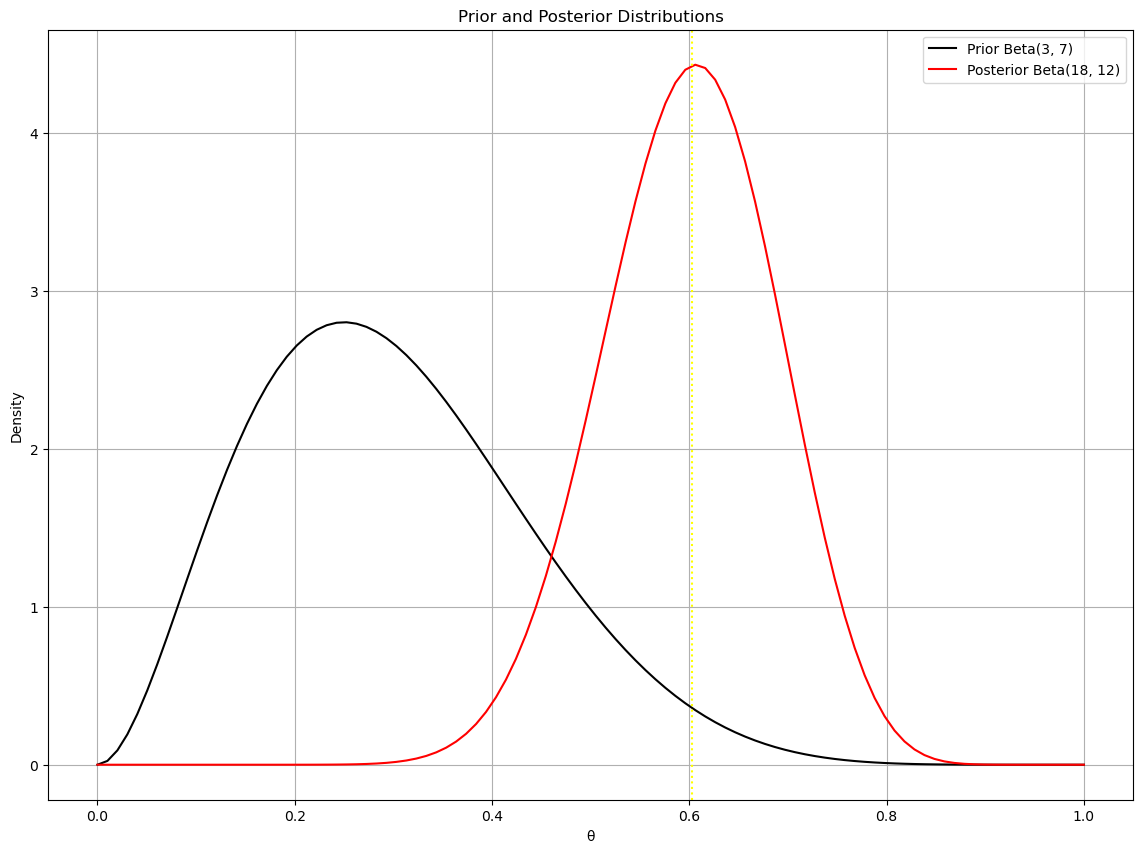

The Posterior Mean (answer for Letter B): 0.6
95% Credible Interval (answer for letter B): [0.42260464 0.76475979]
Predictive Probability of Success for Next Patient (Answer Letter D): 0.5806451612903226


In [2]:
#solvingggggg

k = 15  # successes
n = 20  # total trials

prior_a, prior_B = 3, 7 # based from given


# Posterior params
posterior_a = prior_a + k
posterior_B = prior_B + (n - k)

# Post mean
posterior_mean = posterior_a / (posterior_a + posterior_B)

# 95% ci
credible_interval = stats.beta.ppf([0.025, 0.975], posterior_a, posterior_B)

# Predictive probaba for the next patient
predictive_probability = posterior_a / (posterior_a + posterior_B + 1)

# for dotted line
prior_median = stats.beta.ppf(0.5, prior_a, prior_B)
posterior_median = stats.beta.ppf(0.5, posterior_a, posterior_B)

# Vizzz
x = np.linspace(0, 1, 100)
prior_distribution = stats.beta.pdf(x, prior_a, prior_B)
posterior_distribution = stats.beta.pdf(x, posterior_a, posterior_B)

plt.figure(figsize=(14, 10))
plt.plot(x, prior_distribution, label='Prior Beta(3, 7)', color='black')
plt.plot(x, posterior_distribution, label='Posterior Beta(18, 12)', color='red')

#plt.axvline(prior_median, color='black', linestyle='dotted')
plt.axvline(posterior_median, color='yellow', linestyle='dotted')

plt.title('Prior and Posterior Distributions')
plt.xlabel('θ')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# echo res
print(f"The Posterior Mean (answer for Letter B): {posterior_mean}")
print(f"95% Credible Interval (answer for letter B): {credible_interval}")
print(f"Predictive Probability of Success for Next Patient (Answer Letter D): {predictive_probability}")

----

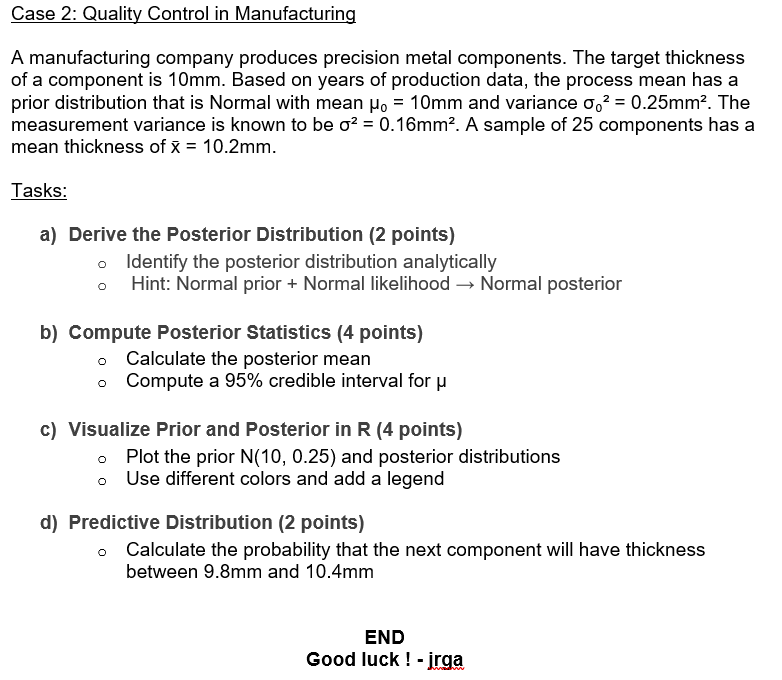

### Letter A


### We have:

Prior: $mu_0 = 10mm$, $sigma_0^2$ = $0.25mm^2$ (Normal distribution)

Likelihood: Sample mean $bar{x}$ = $10.2mm$, known measurement variance $sigma^2 = 0.16mm^2$ 

and sample size $n = 25$

The posterior distribution can be derived using the formula for the model:

\test{Posterior} $$sim N\left(\mu_n, \sigma_n^2\right)$$

Posterior mean $$mu_n$$ is given by:
$$mu_n = \frac{\frac{\mu_0}{\sigma_0^2} + \frac{n \bar{x}}{\sigma^2}}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}$$

Posterior variance $$sigma_n^2$$ is given by:
$$sigma_n^2 = \frac{1}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}$$



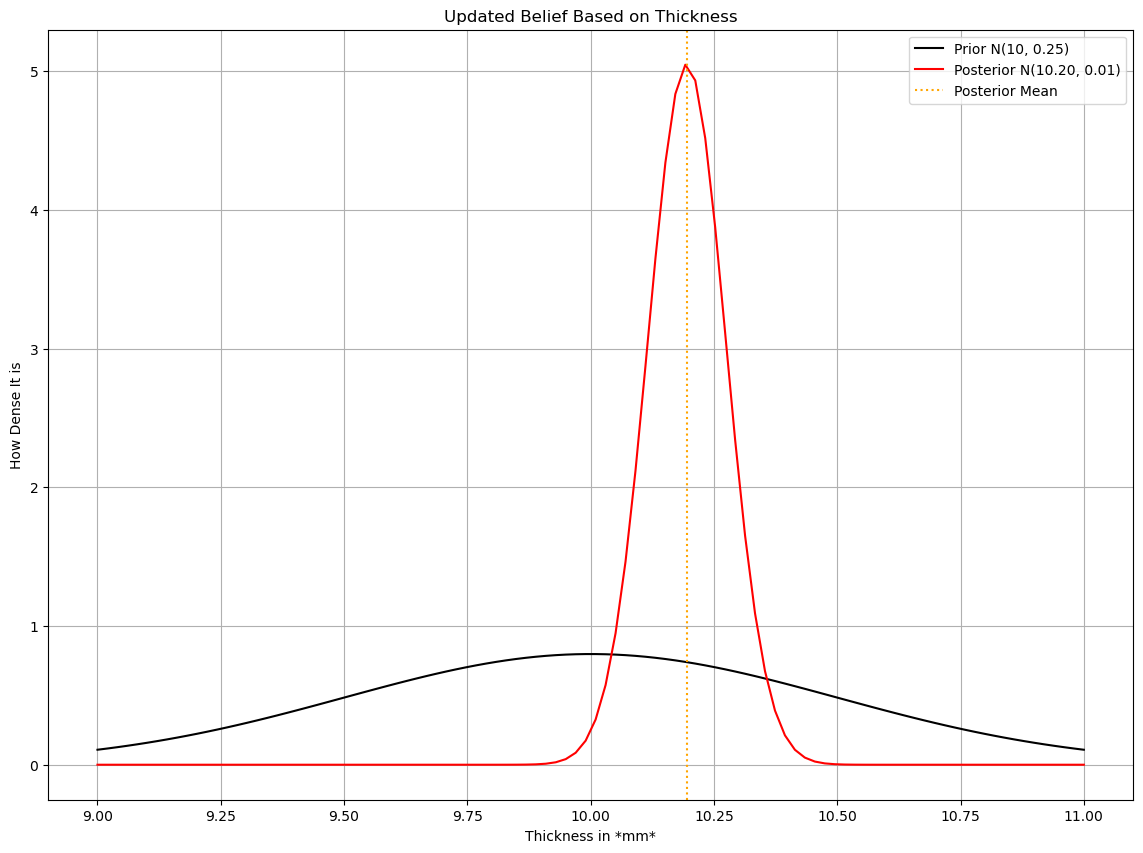

Posterior Mean (Answer Letter B): 10.19500780031201
95% Credible Interval (Answer Letter B): [10.04017995 10.34983565]
Probability that the next component is between 9.8mm and 10.4mm (Answer Letter D): 0.5261163880256344


In [3]:
# Given

prior_mean = 10  # Expected value
prior_var = 0.25  # Uncertainty in prior knowledge
measurement_var = 0.16  # Variance of new observations
sample_size = 25  # Number of new measurements
sample_mean = 10.2  # Average observed thickness

# Updated belief
posterior_var = 1 / (1 / prior_var + sample_size / measurement_var)
posterior_mean = (prior_mean / prior_var + sample_size * sample_mean / measurement_var) * posterior_var

# 95% CI
conf_interval = stats.norm.ppf([0.025, 0.975], loc=posterior_mean, scale=np.sqrt(posterior_var))

# Predictive distribution for next measurement
pred_mean = posterior_mean
pred_var = posterior_var + measurement_var

# Probaba of next measurement falling within a range
prob_within_range = stats.norm.cdf(10.4, loc=pred_mean, scale=np.sqrt(pred_var)) - \
                     stats.norm.cdf(9.8, loc=pred_mean, scale=np.sqrt(pred_var))

# Viz showing prior and post belief
x_vals = np.linspace(9, 11, 100)
prior_pdf = stats.norm.pdf(x_vals, prior_mean, np.sqrt(prior_var))
posterior_pdf = stats.norm.pdf(x_vals, posterior_mean, np.sqrt(posterior_var))

plt.figure(figsize=(14, 10))
plt.plot(x_vals, prior_pdf, label='Prior N(10, 0.25)', color='black')
plt.plot(x_vals, posterior_pdf, label=f'Posterior N({posterior_mean:.2f}, {posterior_var:.2f})', color='red')
plt.axvline(posterior_mean, color='orange', linestyle='dotted', label='Posterior Mean') #orange dotted
plt.title('Updated Belief Based on Thickness')
plt.xlabel('Thickness in *mm*')
plt.ylabel('How Dense It is')
plt.legend()
plt.grid()
plt.show()



# echo res
print(f"Posterior Mean (Answer Letter B): {posterior_mean}")
print(f"95% Credible Interval (Answer Letter B): {conf_interval}")
print(f"Probability that the next component is between 9.8mm and 10.4mm (Answer Letter D): {prob_within_range}")

---end---